# Лабораторная работа №1

### 1. Численное дифференцирование

In [46]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Методы численного дифференцирования
from comp_math.differentiation.numerical.numericalDifferentiator import NumericalDifferentiator

Функции для дифференцирования

In [47]:
# Создает словарь тестовых функций и их аналитических производных
functions = {
    'sin(x^2)': (
        lambda x: np.sin(x**2),
        lambda x: 2*x*np.cos(x**2)),
    'cos(sin(x))': (
        lambda x: np.cos(np.sin(x)),
        lambda x: -np.cos(x)*np.sin(np.sin(x))),
    'exp(sin(cos(x)))': (
        lambda x: np.exp(np.sin(np.cos(x))),
        lambda x: -np.sin(x)*np.cos(np.cos(x))*np.exp(np.sin(np.cos(x)))),
    'ln(x+3)': (
        lambda x: math.log(x+3),
        lambda x: 1/(x+3)),
    '(x+3)^0.5': (
        lambda x: (x+3)**(0.5),
        lambda x: 0.5*(1/((x+3)**(0.5))))
}

# Методы
methods = {
        'Правосторонняя': NumericalDifferentiator.rightDifferentiate,
        'Левосторонняя': NumericalDifferentiator.leftDifferentiate,
        'Двусторонее': NumericalDifferentiator.doubleSideDifferentiate,
        '4-точечная': NumericalDifferentiator.fourNodeDifferentiate,
        '6-точечная': NumericalDifferentiator.sixNodeDifferentiate
    }

In [48]:
h_min = 1e-8
h_max = 1e-1
dots_count = 50
h_values = np.logspace(np.log10(h_min), np.log10(h_max), dots_count)

results = {method_name: {func_name: [] for func_name in functions.keys()} for method_name in methods.keys()}

for method_name, method_func in methods.items():
    for func_name, (func, analytical_deriv) in functions.items():
        x_point = 1
        
        exact_value = analytical_deriv(x_point)
        
        for h in h_values:
            numerical_value = method_func(func, x_point, h)
            error = abs(numerical_value - exact_value)
            results[method_name][func_name].append(error)


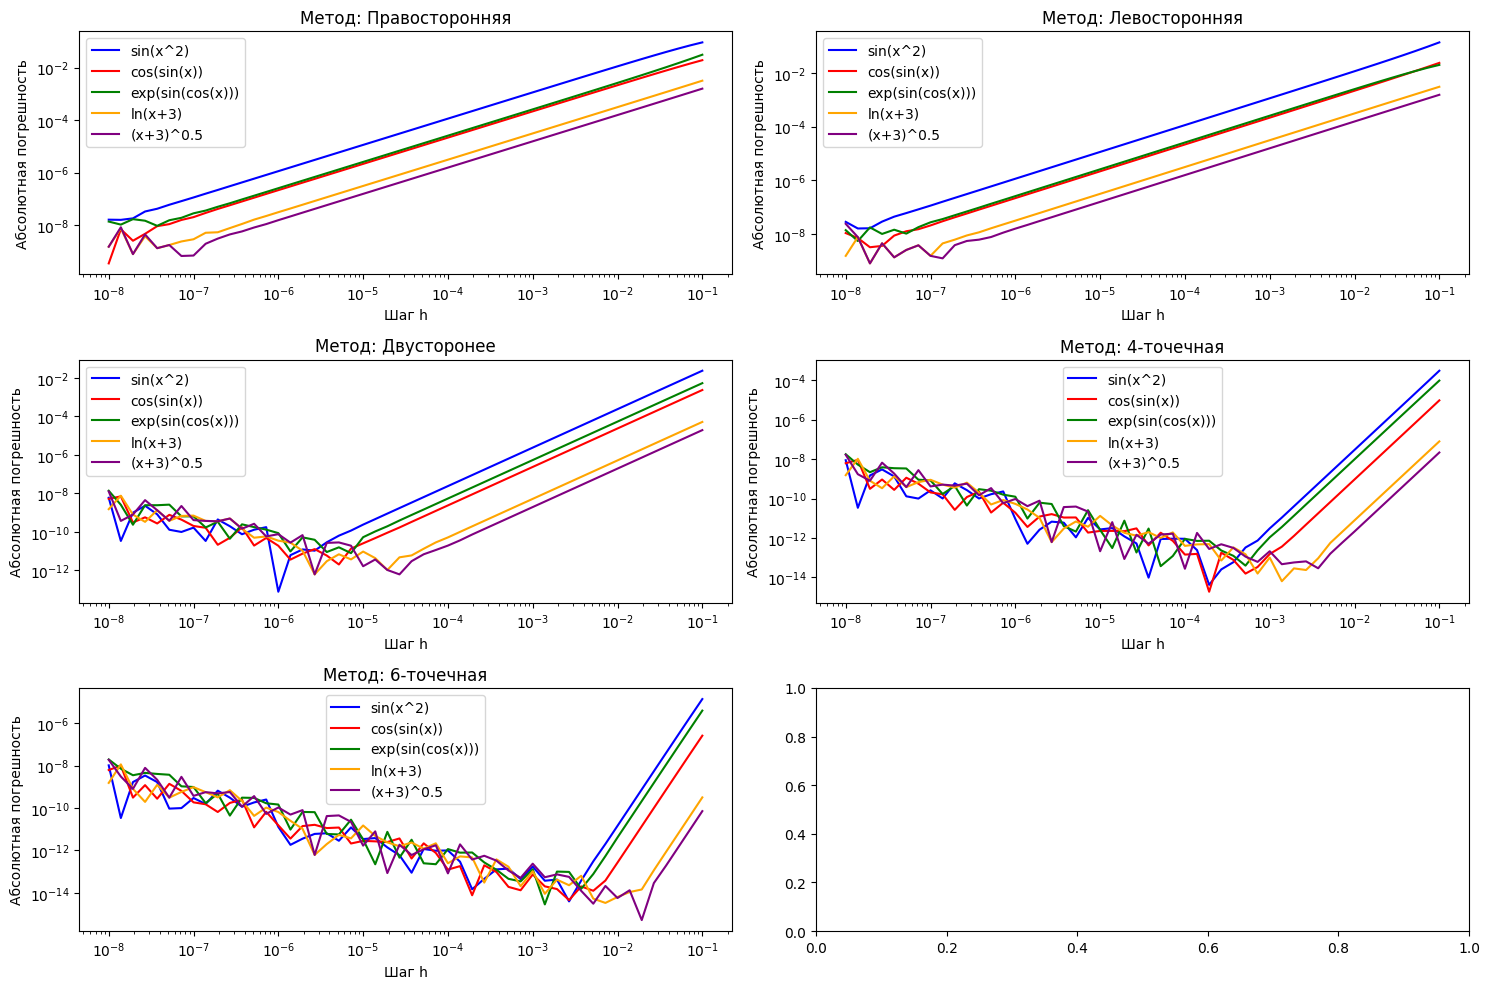

In [49]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, (method_name, func_errors) in enumerate(results.items()):
    ax = axes[i]
    for j, (func_name, errors) in enumerate(func_errors.items()):
        valid_indices = [k for k, error in enumerate(errors) if not np.isnan(error)]
        if valid_indices:
            valid_h = [h_values[k] for k in valid_indices]
            valid_errors = [errors[k] for k in valid_indices]
            ax.loglog(valid_h, valid_errors, color=colors[j], label=func_name)
    
    ax.set_xlabel('Шаг h')
    ax.set_ylabel('Абсолютная погрешность')
    ax.set_title(f'Метод: {method_name}')
    ax.legend()
plt.tight_layout()